# Wine Workshop

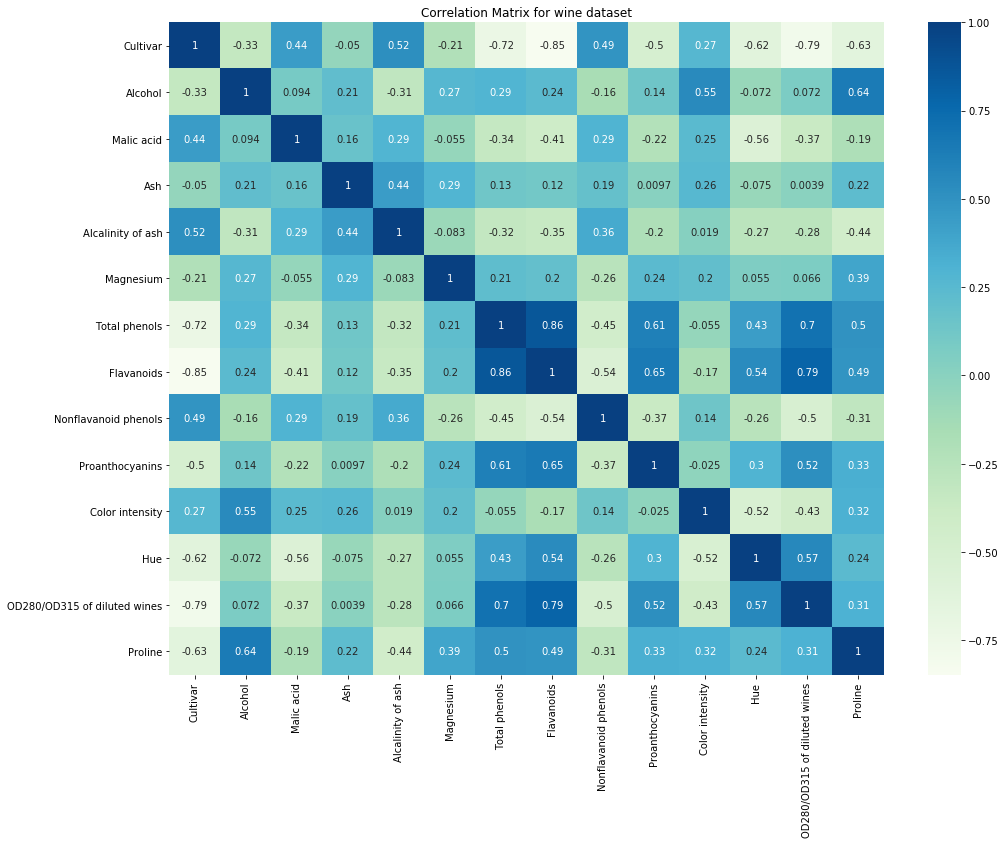

Candidates w.r.t Cultivar:
Alcalinity of ash               0.517859
Total phenols                  -0.719163
Flavanoids                     -0.847498
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Name: Cultivar, dtype: float64

Skipped Features =  {'Total phenols', 'OD280/OD315 of diluted wines'}
Selected Features = ['Alcalinity of ash', 'Flavanoids', 'Hue', 'Proline']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# qtn 1
dataset = pd.read_csv('wine.csv')

# qtn 2
corr_mat = dataset.corr()

# qtn 3
plt.figure(figsize=(16,12))
sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.title('Correlation Matrix for wine dataset')
plt.show()


# qtn 4
df = pd.read_csv('wine.csv')
corr_mat = df.corr()    # performs pearson correlation

target = 'Cultivar'

candidates = corr_mat[target][(corr_mat[target] >= 0.5) | (corr_mat[target] <= -0.5)]
to_drop = set(corr_mat[target].index) - set(candidates.index)

candidates_df = corr_mat.drop(index=to_drop, columns=to_drop)

print('Candidates w.r.t Cultivar:\n',
      candidates_df.drop(index=target)[target],
      '\n', sep='')


# qtn 5
skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]

        # look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]

        # fetch 'Cultivar' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'Cultivar'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'Cultivar'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Skipped Features = ', set(skip) - {target})
print('Selected Features =', accept)



In [4]:
corr_mat.index

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

# Feature Selection Workshop

In [2]:
import pandas as pd

df = pd.read_csv('auto-mpg.csv')
print(df)
corr_mat = df.corr()    # performs pearson correlation
print(corr_mat)
target = 'mpg'
candidates = corr_mat[target][(corr_mat[target] >= 0.5) | (corr_mat[target] <= -0.5)]
to_drop = set(corr_mat[target].index) - set(candidates.index)
candidates_df = corr_mat.drop(index=to_drop, columns=to_drop)

skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]

        # look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]

        # fetch 'mpg' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'mpg'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'mpg'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Selected Features =', accept)


      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

# CA

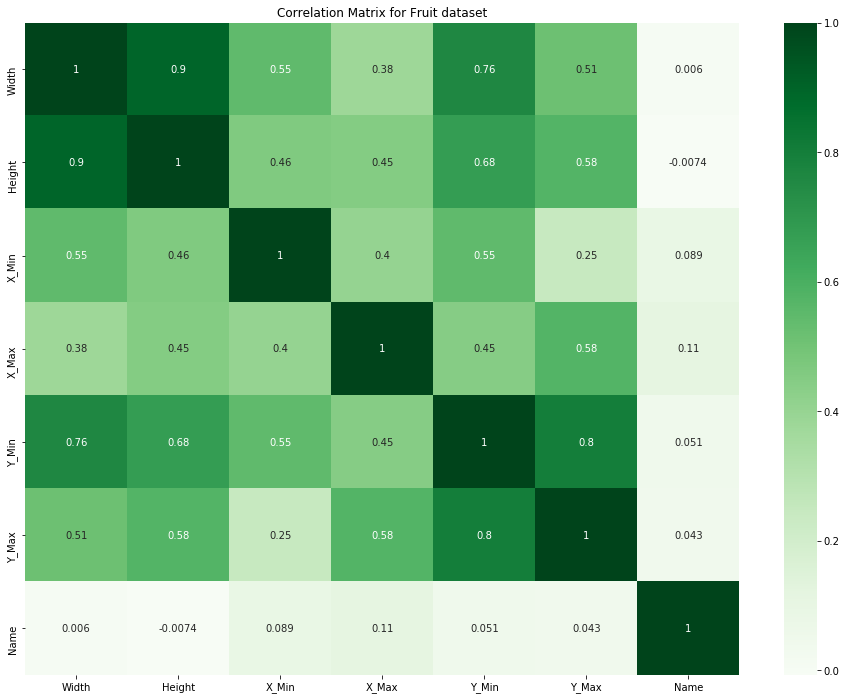

           Width    Height     X_Min     X_Max     Y_Min     Y_Max      Name
Width   1.000000  0.896536  0.546603  0.378830  0.761490  0.512719  0.006003
Height  0.896536  1.000000  0.463169  0.449836  0.676914  0.577108 -0.007442
X_Min   0.546603  0.463169  1.000000  0.402139  0.547007  0.245922  0.088781
X_Max   0.378830  0.449836  0.402139  1.000000  0.448454  0.578095  0.113606
Y_Min   0.761490  0.676914  0.547007  0.448454  1.000000  0.802428  0.050552
Y_Max   0.512719  0.577108  0.245922  0.578095  0.802428  1.000000  0.042630
Name    0.006003 -0.007442  0.088781  0.113606  0.050552  0.042630  1.000000
Target: Name
candidates: X_Min    0.088781
X_Max    0.113606
Y_Min    0.050552
Name     1.000000
Name: Name, dtype: float64
to_drop: {'Width', 'Height', 'Y_Max'}
Candidates w.r.t output :
X_Min    0.088781
X_Max    0.113606
Y_Min    0.050552
Name: Name, dtype: float64

Selected Features = ['X_Min', 'X_Max', 'Y_Min']


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

fruit_data = pd.read_csv('Fruit_Train.csv').dropna()

df = pd.DataFrame(fruit_data,columns=['Filename','Image_Path','Width','Height','Depth',
                                      'X_Min','X_Max','Y_Min','Y_Max','Name'])

df['Name'] = df['Name'].astype('category') 
df['Name'] = df['Name'].cat.codes

df1 = pd.DataFrame(df,columns=['Width','Height','X_Min','X_Max','Y_Min','Y_Max','Name'])

corr_mat = df1.corr()    # performs pearson correlation


plt.figure(figsize=(16,12))
sns.heatmap(data=corr_mat, annot=True, cmap='Greens')
plt.title('Correlation Matrix for Fruit dataset')
plt.show()



print(corr_mat)
target ='Name'
print("Target:",target)
candidates = corr_mat[target][(corr_mat[target] >= 0.05) | (corr_mat[target] <= -0.05)]
to_drop = set(corr_mat[target].index) - set(candidates.index)
candidates_df = corr_mat.drop(index=to_drop, columns=to_drop)

print("candidates:",candidates)
print("to_drop:",to_drop)
print('Candidates w.r.t output :\n',
      candidates_df.drop(index=target)[target],
      '\n', sep='')

skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]

        # look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]

        # fetch 'mpg' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'mpg'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'mpg'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Selected Features =', accept)